In [1]:
# Day 14 exploring Clustring algorithm 

In [4]:
import numpy as np
from collections import defaultdict
from scipy.spatial.distance import cdist
from itertools import combinations
import matplotlib.pyplot as plt


def kmeans(X, k, max_iters=100):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):-
        labels = np.argmin(cdist(X, centroids), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids



def hierarchical(X, k):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > k:
        min_dist = float('inf')
        to_merge = None
        for c1, c2 in combinations(clusters, 2):
            d = np.min([np.linalg.norm(X[i] - X[j]) for i in c1 for j in c2])
            if d < min_dist:
                min_dist = d
                to_merge = (c1, c2)
        new_cluster = to_merge[0] + to_merge[1]
        clusters = [c for c in clusters if c not in to_merge]
        clusters.append(new_cluster)
    labels = np.zeros(len(X), dtype=int)
    for i, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = i
    return labels


def dbscan(X, eps=0.5, min_pts=5):
    labels = [-1] * len(X)
    cluster_id = 0

    def region_query(point_idx):
        return [i for i in range(len(X)) if np.linalg.norm(X[i] - X[point_idx]) <= eps]

    def expand_cluster(point_idx, neighbors):
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            n = neighbors[i]
            if labels[n] == -1:
                labels[n] = cluster_id
            elif labels[n] is None:
                labels[n] = cluster_id
                n_neighbors = region_query(n)
                if len(n_neighbors) >= min_pts:
                    neighbors += n_neighbors
            i += 1

    for i in range(len(X)):
        if labels[i] != -1:
            continue
        neighbors = region_query(i)
        if len(neighbors) < min_pts:
            labels[i] = -1
        else:
            expand_cluster(i, neighbors)
            cluster_id += 1
    return labels



def mean_shift(X, radius=1.0, max_iters=300):
    centroids = np.copy(X)
    for _ in range(max_iters):
        new_centroids = []
        for c in centroids:
            neighbors = X[np.linalg.norm(X - c, axis=1) < radius]
            if len(neighbors) > 0:
                new_c = neighbors.mean(axis=0)
                new_centroids.append(new_c)
        centroids = np.unique(np.round(new_centroids, 2), axis=0)
    labels = np.argmin(cdist(X, centroids), axis=1)
    return labels, centroids


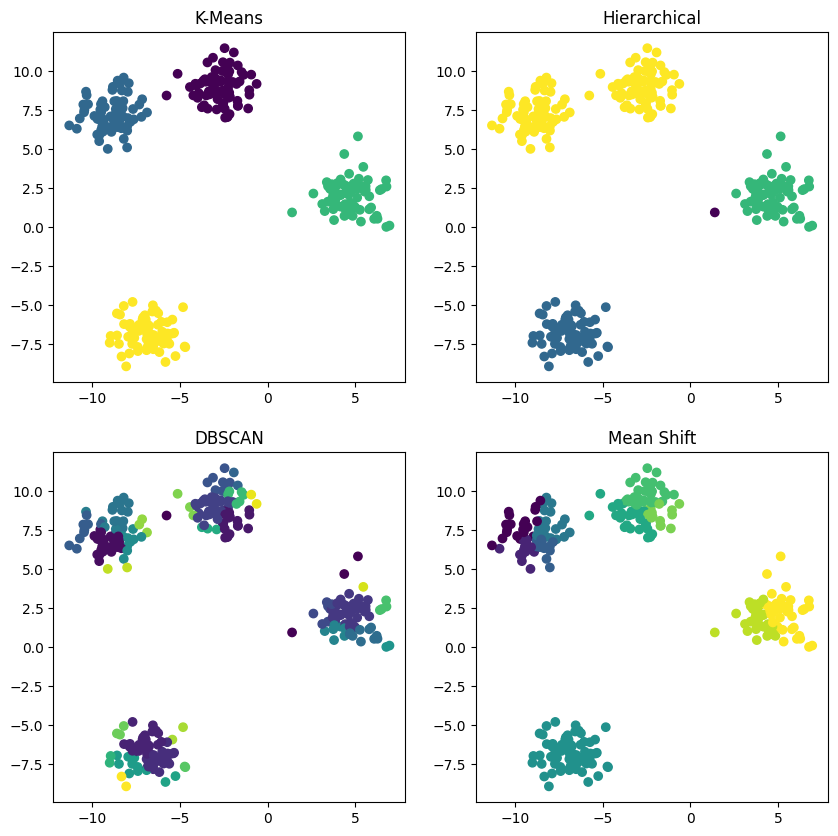

In [5]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# K-Means
labels_kmeans, _ = kmeans(X, 4)

# Hierarchical
labels_hier = hierarchical(X, 4)

# DBSCAN
labels_dbscan = dbscan(X, eps=1.2, min_pts=5)

# Mean Shift
labels_meanshift, _ = mean_shift(X, radius=2)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].scatter(X[:,0], X[:,1], c=labels_kmeans); axs[0,0].set_title('K-Means')
axs[0,1].scatter(X[:,0], X[:,1], c=labels_hier); axs[0,1].set_title('Hierarchical')
axs[1,0].scatter(X[:,0], X[:,1], c=labels_dbscan); axs[1,0].set_title('DBSCAN')
axs[1,1].scatter(X[:,0], X[:,1], c=labels_meanshift); axs[1,1].set_title('Mean Shift')
plt.show()
